In [1]:
import numpy as np
import math
from scipy.stats import poisson
from matplotlib import pyplot as plt

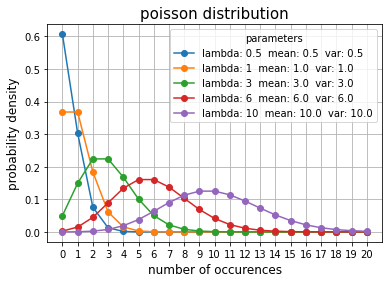

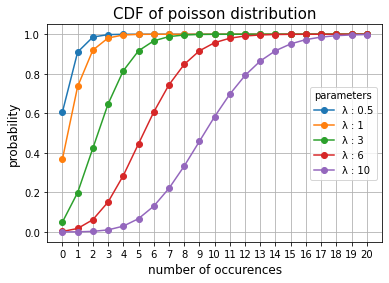

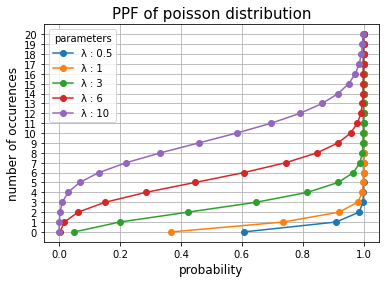

In [3]:
# using scipy PMF, CDF, PPF
# define lambda parameters
lambda_values = [0.5, 1, 3, 6, 10]

values = [value for value in range(0, 21)]
for lambda_val in lambda_values:
    # create distribution
    dist = poisson(lambda_val)
    # statistics
    mean, var = poisson.stats(lambda_val, moments='mv')
    probabilities = [dist.pmf(value) for value in values]
    # plot PMF 
    plt.plot(values, probabilities, marker='o', label='lambda: {0:}  mean: {1:}  var: {1:}'\
         .format(lambda_val, mean, var))
plt.xlabel('number of occurences', fontsize=12)
plt.ylabel('probability density', fontsize=12)
plt.title('poisson distribution', fontsize=15)
plt.legend(title ='parameters', loc ='upper right')
# make x ticks all integers
int_list = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(int_list)
plt.grid()
plt.savefig('poisson_pmf.svg')
plt.show();

# plot CDF
for lambda_val in lambda_values:
    cum_prob = [poisson.cdf(value, lambda_val) for value in values]
    plt.plot(values, cum_prob, marker='o', label=chr(955)+' : '+str(lambda_val))
plt.xlabel('number of occurences', fontsize=12)
plt.ylabel('probability', fontsize=12)
plt.title("CDF of poisson distribution", fontsize=15)
plt.legend(title = 'parameters', loc = 'center right')
plt.xticks(int_list)
plt.grid()
plt.savefig('poisson_cdf.svg')
plt.show();

# plot PPF
for lambda_val in lambda_values:
    cum_prob = [poisson.cdf(value, lambda_val) for value in values]
    plt.plot(cum_prob, values, marker='o', label=chr(955)+' : '+str(lambda_val))
#plt.plot(cum_prob2, values, marker='.', label=chr(955)+' : '+str(lambda_val2))
#plt.plot(cum_prob3, values, marker='.', label=chr(955)+' : '+str(lambda_val3))
plt.ylabel('number of occurences', fontsize=12)
plt.xlabel('probability', fontsize=12)
plt.title("PPF of poisson distribution", fontsize=15)
plt.legend(title = 'parameters', loc = 'upper left')
plt.yticks(int_list)
plt.grid()
plt.savefig('poisson_ppf.svg')
plt.show();

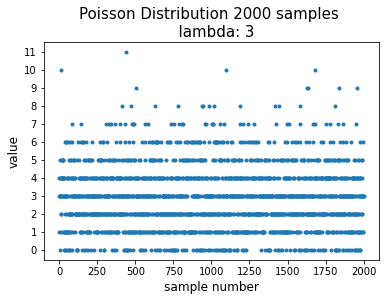

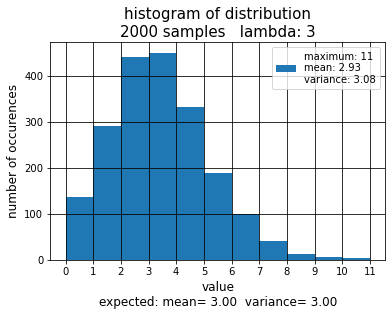

In [4]:
# generate poisson distribution from scipy
lambda_val = 3
samples = 2000
data = poisson.rvs(lambda_val, size=samples)

# statistics
len_data = len(data)
mean = sum(data)/len(data)
max_data = max(data)
var_data = [((mean - data[n])**2) for n in range(len_data)]
variance = sum(var_data) / len_data

# plot data
plt.scatter(range(samples), data, marker='.')
plt.ylabel('value', fontsize=12)
plt.xlabel('sample number', fontsize=12)
plt.title('Poisson Distribution {0:} samples \n  lambda: {1:}'.format(samples, lambda_val), fontsize=15)
plt.savefig('poisson_samples.svg')
plt.yticks(range(0, max_data+1))
plt.show();

# histogram
plt.hist(data, bins= range(0, max_data+1, 1), label='maximum: {0:}\nmean: {1:.2f}\nvariance: {2:.2f}'\
         .format(max_data, mean, variance))
plt.ylabel('number of occurences', fontsize=12)
plt.xlabel('value\nexpected: mean= {0:.2f}  variance= {1:.2f}'\
           .format(lambda_val, lambda_val), fontsize=12)
plt.title('histogram of distribution\n{0:} samples   lambda: {1:}'.format(samples, lambda_val) , fontsize=15)
plt.xticks(range(0, max_data+1))
plt.legend()
plt.grid(color='black')
plt.savefig('poisson_hist.svg')
plt.show();